In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
breastmnist=pd.read_csv('breastmnist_forest_knn_results.csv')
cifar10=pd.read_csv('cifar10_forest_knn_results.csv')
cifar100=pd.read_csv('cifar100_forest_knn_results.csv')
dermamnist=pd.read_csv('dermamnist_forest_knn_results.csv')

In [189]:
# from sklearn.inspection import permutation_importance

# df = breastmnist
# # Step 1: Train Your Model
# features = df.drop(columns=['accuracy', 'precision', 'recall', 'f1_score', 'trainigtime'])
# y = df['accuracy']
# # Encode categorical variables
# X = pd.get_dummies(features, drop_first=False)    


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestRegressor(random_state=42)
# model.fit(X_train, y_train)

# # Step 2: Evaluate Baseline Performance
# y_pred = model.predict(X_test)
# baseline_mse = mean_squared_error(y_test, y_pred)
# print(f"Baseline MSE: {baseline_mse:.4f}")


# # Perform permutation importance
# results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# # Extract importance scores
# importance_scores = results.importances_mean
# importance_std = results.importances_std

# # Create a DataFrame for better visualization
# feature_importance_df = pd.DataFrame({
#     "Feature": X_test.columns,
#     "Importance": importance_scores,
#     "Std": importance_std
# }).sort_values(by="Importance", ascending=False)

# # Display feature importance
# print(feature_importance_df)


In [190]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.inspection import permutation_importance
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming data_encoded is your dataset with encoded features and 'accuracy' is your target variable
# df = breastmnist
# # Step 1: Train Your Model
# features = df.drop(columns=['accuracy', 'precision', 'recall', 'f1_score', 'trainigtime'])
# y = df['accuracy']
# # Encode categorical variables
# X = pd.get_dummies(features, drop_first=False)    


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestRegressor(random_state=42)
# model.fit(X_train, y_train)

# # Step 2: Evaluate Baseline Performance
# y_pred = model.predict(X_test)
# baseline_mse = mean_squared_error(y_test, y_pred)
# print(f"Baseline MSE: {baseline_mse:.4f}")

# # Step 3: Calculate Permutation Feature Importance
# results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
# importance_scores = results.importances_mean
# importance_std = results.importances_std

# # Step 4: Create a Mapping from Encoded Features to Original Features
# # Assuming you have a dictionary that maps encoded feature names to original feature names
# # Example: {"feature1_encoded1": "feature1", "feature1_encoded2": "feature1", "feature2_encoded1": "feature2", ...}
# encoded_to_original = {
#     # "sampeling method_oob": "sampeling method",
#     "sampeling method_smote": "sampeling method",
#     "sampeling method_bootstrap": "sampeling method",
#     "sampeling method_stratified": "sampeling method",
#     "distance method_euclidean": "distance method",
#     "distance method_manhattan": "distance method",
#     "distance method_cosine": "distance method",
#     "projection method_random": "projection method",
#     "projection method_pca": "projection method",
#     "n_components": "n_components",
#     "variance threshhold": "variance threshhold",
#     "nubmber of stimators": "nubmber of stimators",
#      "k": "k",
#       "n_components": "n_components"
#     # Add all your mappings here
# }

# # Step 5: Aggregate Importances
# original_feature_importance = {}
# for encoded_feature, original_feature in encoded_to_original.items():
#     importance = importance_scores[X_test.columns.get_loc(encoded_feature)]
#     if original_feature in original_feature_importance:
#         original_feature_importance[original_feature] += importance
#     else:
#         original_feature_importance[original_feature] = importance
        

# # Convert to DataFrame for better visualization
# feature_importance_df = pd.DataFrame({
#     "Feature": list(original_feature_importance.keys()),
#     "Importance": list(original_feature_importance.values())
# }).sort_values(by="Importance", ascending=False)

# # Step 6: Visualize Feature Importance
# plt.figure(figsize=(12, 8))
# plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color='skyblue')
# plt.xlabel("Importance")
# plt.title("Permutation Feature Importance (Original Features)")
# plt.gca().invert_yaxis()
# plt.show()


In [191]:
breastmnist.columns

Index(['projection method', 'n_components', 'variance threshhold', 'k',
       'nubmber of stimators', 'distance method', 'sampeling method',
       'accuracy', 'precision', 'recall', 'f1_score', 'trainigtime'],
      dtype='object')

In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt



def feature_importance(df):
        
        df = df[df['sampeling method'] != 'oob']
        features = df.drop(columns=['accuracy', 'precision', 'recall', 'f1_score', 'trainigtime'])
        y = df['accuracy']
        
        X = pd.get_dummies(features, drop_first=False)    

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)

        
        y_pred = model.predict(X_test)
        baseline_mse = mean_squared_error(y_test, y_pred)
        print(f"Baseline MSE: {baseline_mse:.4f}")

       
        importance_scores = model.feature_importances_

        
        encoded_to_original = {
            "sampeling method_smote": "sampeling method",
            "sampeling method_bootstrap": "sampeling method",
            "sampeling method_stratified": "sampeling method",
            "distance method_euclidean": "distance method",
            "distance method_manhattan": "distance method",
            "distance method_cosine": "distance method",
            "projection method_random": "projection method",
            "projection method_pca": "projection method",
            "n_components": "n_components",
            "variance threshhold": "variance threshhold",
            "nubmber of stimators": "nubmber of stimators",
            "k": "k",
            "n_components": "n_components"
            # Add all your mappings here
        }

        # Step 5: Aggregate Importances
        original_feature_importance = {}
        for encoded_feature, original_feature in encoded_to_original.items():
            importance = importance_scores[X_test.columns.get_loc(encoded_feature)]
            if original_feature in original_feature_importance:
                original_feature_importance[original_feature] += importance
            else:
                original_feature_importance[original_feature] = importance

        # Convert to DataFrame for better visualization
        feature_importance_df = pd.DataFrame({
            "Feature": list(original_feature_importance.keys()),
            "Importance": list(original_feature_importance.values())
        }).sort_values(by="Importance", ascending=False)

        # Step 6: Visualize Feature Importance
        plt.figure(figsize=(12, 8))
        plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color='skyblue')
        plt.xlabel("Importance")
        plt.title("Hyperparameter Importance(cifar10)")
        plt.gca().invert_yaxis()
        plt.show()


Baseline MSE: 0.0000


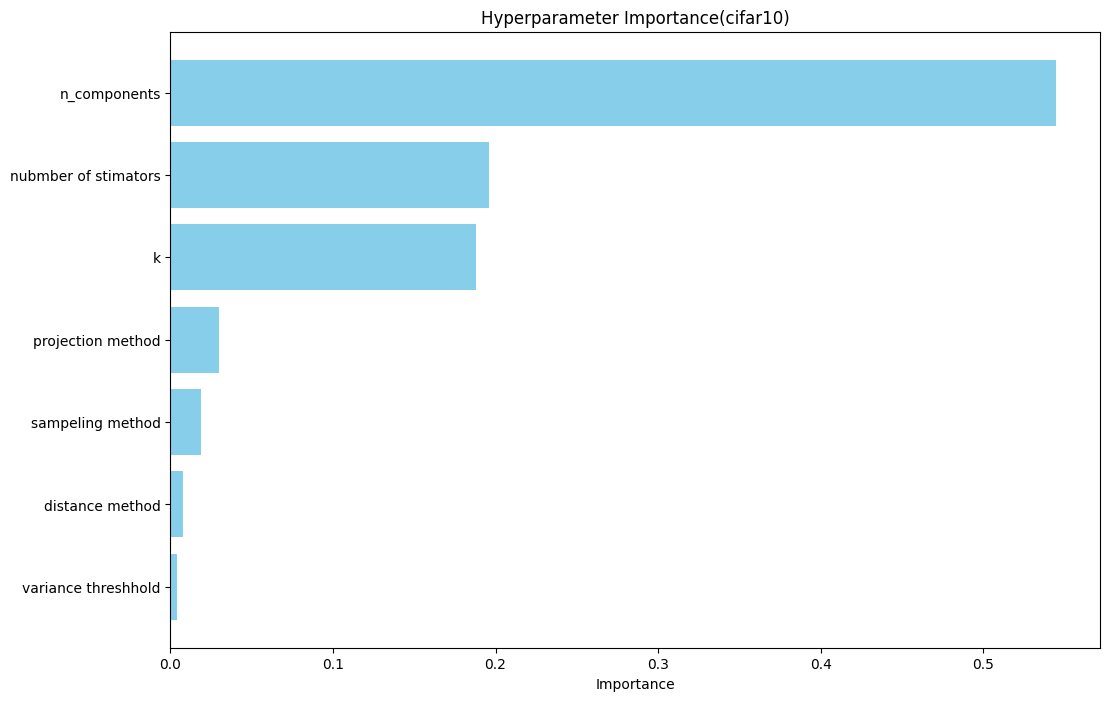

In [205]:
feature_importance(cifar10)

In [208]:

def Imp_hyper(df):

# Define features and target
        features = df.drop(columns=['precision', 'recall', 'f1_score', 'trainigtime'])
        target = df['accuracy']

        # Encode categorical variables
        features_encoded = pd.get_dummies(features, drop_first=False)

        # Add the target to the encoded features
        features_encoded['accuracy'] = target

        # Compute the correlation matrix
        corr_matrix = features_encoded.corr()

        # Extract correlations with the target
        correlations_with_target = corr_matrix['accuracy'].sort_values(key=abs, ascending=False)

        # Display the correlations
        print(correlations_with_target)

        # Plot the bar chart
        plt.figure(figsize=(10, 8))
        correlations_with_target.drop('accuracy').plot(kind='barh', color='skyblue')
        plt.xlabel('Correlation Coefficient')
        plt.title('Correlation of Features with Accuracy (cifar100)')
        plt.gca().invert_yaxis()
        plt.show()


accuracy                       1.000000
nubmber of stimators           0.680056
n_components                   0.607817
k                              0.442998
sampeling method_bootstrap     0.234112
sampeling method_smote         0.217737
sampeling method_stratified   -0.177921
distance method_cosine         0.127539
sampeling method_oob          -0.124095
distance method_manhattan     -0.044509
variance threshhold           -0.042000
sampeling method_balanced      0.038805
projection method_random      -0.012935
projection method_pca          0.012935
distance method_euclidean      0.002871
Name: accuracy, dtype: float64


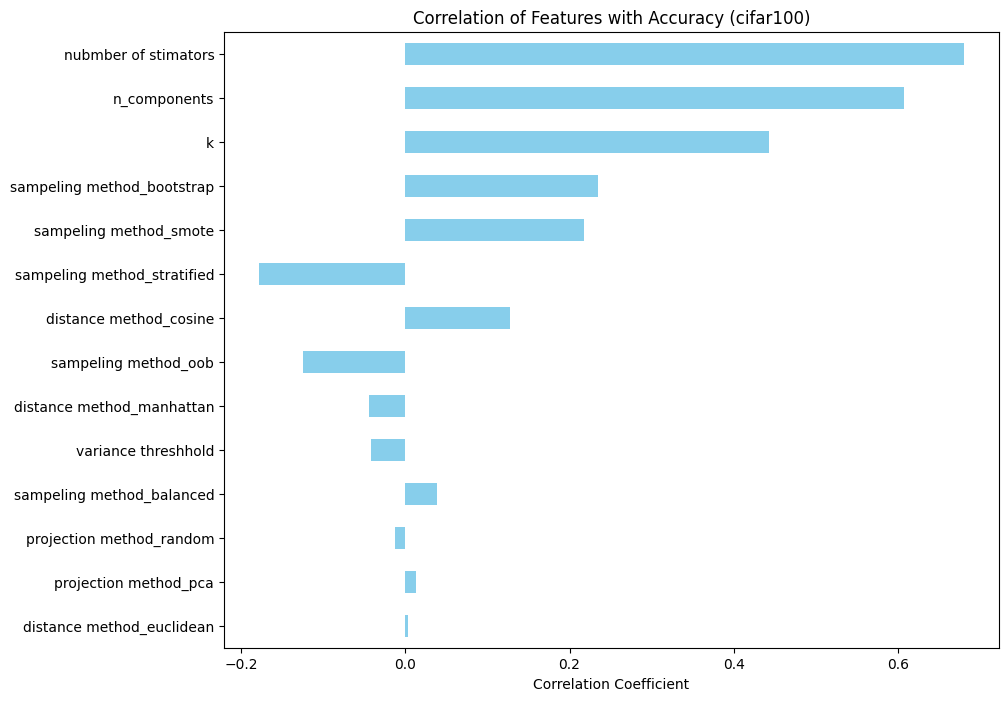

In [209]:
Imp_hyper(cifar100)

BreastMNIST - Baseline MSE: 0.0005
DermaMNIST - Baseline MSE: 0.0000
CIFAR-10 - Baseline MSE: 0.0000
CIFAR-100 - Baseline MSE: 0.0000


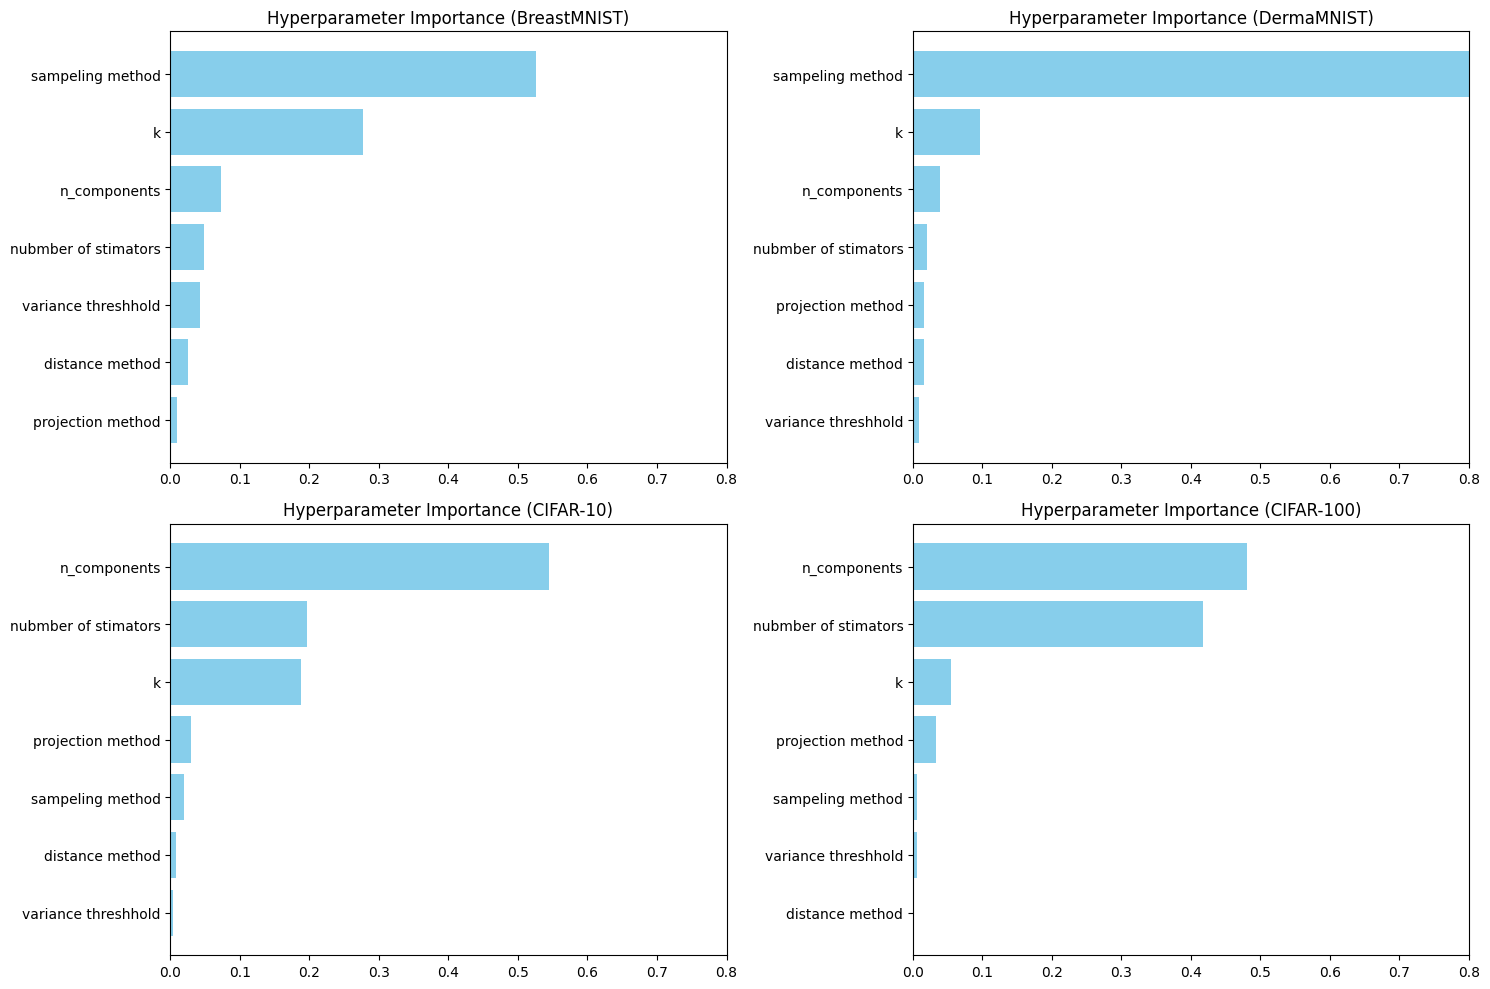

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def feature_importance(df, dataset_name):
    df = df[df['sampeling method'] != 'oob']
    features = df.drop(columns=['accuracy', 'precision', 'recall', 'f1_score', 'trainigtime'])
    y = df['accuracy']

    X = pd.get_dummies(features, drop_first=False)    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    baseline_mse = mean_squared_error(y_test, y_pred)
    print(f"{dataset_name} - Baseline MSE: {baseline_mse:.4f}")

    importance_scores = model.feature_importances_

    encoded_to_original = {
        "sampeling method_smote": "sampeling method",
        "sampeling method_bootstrap": "sampeling method",
        "sampeling method_stratified": "sampeling method",
        "distance method_euclidean": "distance method",
        "distance method_manhattan": "distance method",
        "distance method_cosine": "distance method",
        "projection method_random": "projection method",
        "projection method_pca": "projection method",
        "n_components": "n_components",
        "variance threshhold": "variance threshhold",
        "nubmber of stimators": "nubmber of stimators",
        "k": "k"
        # Add all your mappings here
    }

    original_feature_importance = {}
    for encoded_feature, original_feature in encoded_to_original.items():
        if encoded_feature in X_test.columns:
            importance = importance_scores[X_test.columns.get_loc(encoded_feature)]
            if original_feature in original_feature_importance:
                original_feature_importance[original_feature] += importance
            else:
                original_feature_importance[original_feature] = importance

    feature_importance_df = pd.DataFrame({
        "Feature": list(original_feature_importance.keys()),
        "Importance": list(original_feature_importance.values())
    }).sort_values(by="Importance", ascending=False)

    return feature_importance_df, dataset_name

def plot_combined_feature_importance(dfs):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    dataset_names = ['BreastMNIST', 'DermaMNIST', 'CIFAR-10', 'CIFAR-100']

    for i, (df, dataset_name) in enumerate(dfs):
        row, col = divmod(i, 2)
        axs[row, col].barh(df["Feature"], df["Importance"], color='skyblue')
        axs[row, col].set_title(f"Hyperparameter Importance ({dataset_name})")
        axs[row, col].invert_yaxis()
        axs[row, col].set_xlim(0, 0.8)

    plt.tight_layout()
    plt.show()

# Example usage
dfs = []


dfs.append(feature_importance(breastmnist, 'BreastMNIST'))
dfs.append(feature_importance(dermamnist, 'DermaMNIST'))
dfs.append(feature_importance(cifar10, 'CIFAR-10'))
dfs.append(feature_importance(cifar100, 'CIFAR-100'))

plot_combined_feature_importance(dfs)
